## Step1-Data Exploration :

In [2]:
import pandas as pd

# Load the Excel file
file_path = r"C:\Users\145989\Downloads\BI & DATA ANALYST ASSESSMENT - ANONYMIZED SAMPLE.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Print a clean divider
print("="*50)
print("Data Preview (Top 5 Rows):")
print("="*50)
display(df.head())

print("\n" + "="*50)
print("DataFrame Info:")
print("="*50)
df_info = df.info()

print("\n" + "="*50)
print("Numeric Summary Statistics:")
print("="*50)
display(df.describe())


Data Preview (Top 5 Rows):


,Tracking Number,Parcel Number,Destinataire,carrier_pickup_date_time,carrier_first_attempt_date_time,carrier_delivery_date_time,carrier_Return_date_time,carrier_status_code,Carrier Macro Status,carrier_current_status_date_time,...,Mode paiement,carrier_second_attempt_date,carrier_third_attempt_date,Montant Colis,N°Virement,Date Virement,Montant Remboursé,Return/Order,Carrier,Email
0,62783936923591,NaN,Customer 2464,2025-05-05T15:29:00,NaN,NaN,NaN,NaN,Delivered,2025-05-06T14:36:00,...,COD,NaN,NaN,1036.04,NaN,NaN,NaN,Order,OTM,customer2464@example.com
1,62817161381831,NaN,Customer 2509,2025-05-06T16:57:00,NaN,NaN,NaN,NaN,Delivered,2025-05-08T08:54:00,...,COD,NaN,NaN,344.28,NaN,NaN,NaN,Order,OTM,customer2509@example.com
2,R90913432874,030000000592704512,Customer 2987,2025-05-22T00:00:00,NaN,NaN,NaN,29042.0,On the way,2025-05-22T20:47:00,...,COD,NaN,NaN,979.85,NaN,NaN,NaN,Order,CP,customer2987@example.com
3,R90900003138,030000000545853748,Customer 1407,2025-03-18T17:25:00,NaN,NaN,NaN,30611.0,Delivered,2025-03-18T17:25:00,...,COD,NaN,NaN,1002.74,CASHDU100425R909,2025-04-10T00:00:00,890.0,Order,CP,customer1407@example.com
4,R90900002632,030000000545094523,Customer 860,2025-02-24T20:37:00,2025-02-25T11:55:42,2025-02-26T13:16:00,NaN,29506.0,Delivered,2025-02-26T13:16:00,...,Prepayed,2025-02-26T10:55:14,NaN,25.15,NaN,NaN,NaN,Order,CP,customer860@example.com



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2211 entries, 0 to 2210
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Tracking Number                   2210 non-null   object 
 1   Parcel Number                     1714 non-null   object 
 2   Destinataire                      2211 non-null   object 
 3   carrier_pickup_date_time          2140 non-null   object 
 4   carrier_first_attempt_date_time   1006 non-null   object 
 5   carrier_delivery_date_time        946 non-null    object 
 6   carrier_Return_date_time          16 non-null     object 
 7   carrier_status_code               1715 non-null   float64
 8   Carrier Macro Status              2202 non-null   object 
 9   carrier_current_status_date_time  2210 non-null   object 
 10  carrier_chargable_weight          1715 non-null   float64
 11  Tier                              1403 non-null   ob

,carrier_status_code,carrier_chargable_weight,Poids,Montant Colis,Montant Remboursé
count,1715.000000,1715.000000,1715.000000,2211.000000,814.000000
mean,31858.494461,1945.189504,1945.189504,595.838412,654.359951
std,5817.538866,227.676372,227.676372,432.118911,407.181688
min,18933.000000,1000.000000,1000.000000,0.000000,12.000000
25%,30101.000000,2000.000000,2000.000000,302.125000,379.000000
50%,30610.000000,2000.000000,2000.000000,557.410000,580.000000
75%,30611.000000,2000.000000,2000.000000,823.295000,810.000000
max,43036.000000,2000.000000,2000.000000,3118.690000,3180.000000


# Step 1: Understand the Data
# 1. What the file contains:
# This dataset appears to track parcels for a delivery/logistics operation. Each row represents a shipment or return, and includes:

# * Tracking metadata: tracking number, parcel number, pickup & delivery timestamps
# * Customer details: email, city (Ville), zone, and payment method
# * Operational events: delivery attempts, delivery/return status
# * Financials: parcel value (Montant Colis), refund details (Montant Remboursé, Date Virement)
# * Categorization: Return vs Order, Carrier, Carrier Status

# 2. Key Observations:
# * Numerous missing values — most notably in return dates and second/third attempt timestamps.
# * Several key date columns are strings, not datetime.
# * Financial data (Montant Colis, Montant Remboursé) is numeric and clean.
# * Return vs Order and Carrier Macro Status are categorical and good for operational KPIs.

# 3. Assumptions:
# * If carrier_delivery_date_time is null but there are multiple attempts, the parcel was likely not delivered.
# * If Montant Remboursé is null for a return, the refund hasn’t yet been processed.
# * COD = cash collected on delivery; “Prepayed” implies no cash collected.



 Missing Values Summary:


,Missing Count,Missing %
carrier_Return_date_time,2195,99.28
carrier_third_attempt_date,2028,91.72
carrier_second_attempt_date,1820,82.32
Date Virement,1397,63.18
N°Virement,1397,63.18
Montant Remboursé,1397,63.18
carrier_delivery_date_time,1265,57.21
carrier_first_attempt_date_time,1205,54.50
Zone,950,42.97
Tier,808,36.54


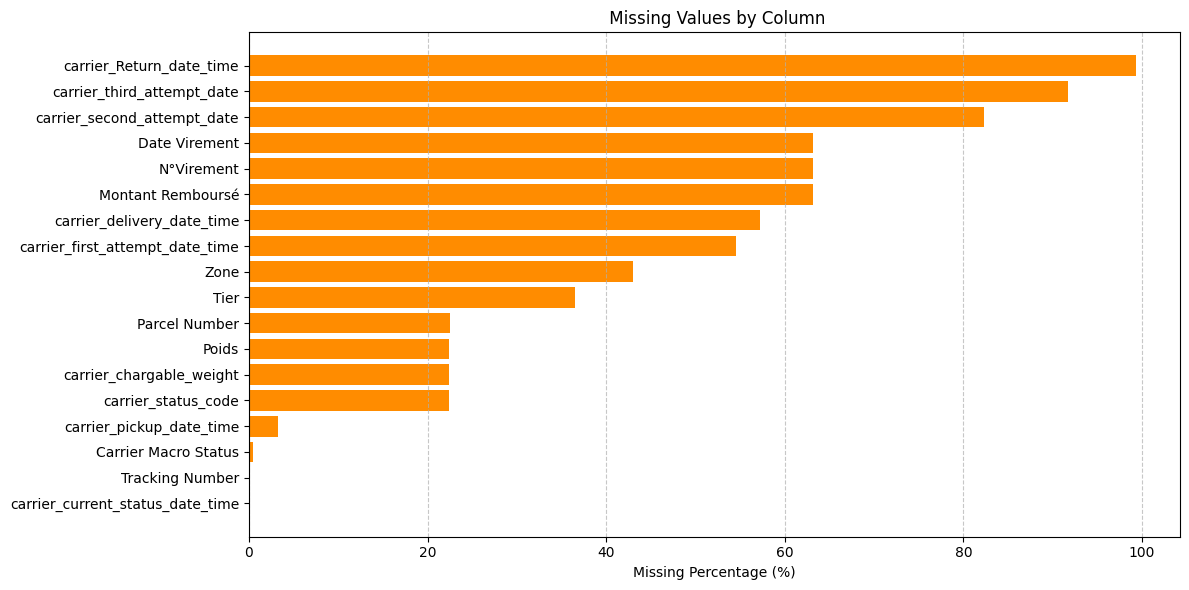

In [6]:
import matplotlib.pyplot as plt

# Calculate missing values
missing_counts = df.isnull().sum()
missing_percent = ((missing_counts / len(df)) * 100).round(2)

# Combine into a DataFrame
missing_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing %': missing_percent
}).sort_values(by='Missing %', ascending=False)

# Filter only columns with missing data
missing_df = missing_df[missing_df['Missing Count'] > 0]

# Display in table
print(" Missing Values Summary:")
display(missing_df)

# Bar Plot
plt.figure(figsize=(12, 6))
plt.barh(missing_df.index, missing_df['Missing %'], color='darkorange')
plt.xlabel("Missing Percentage (%)")
plt.title(" Missing Values by Column")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


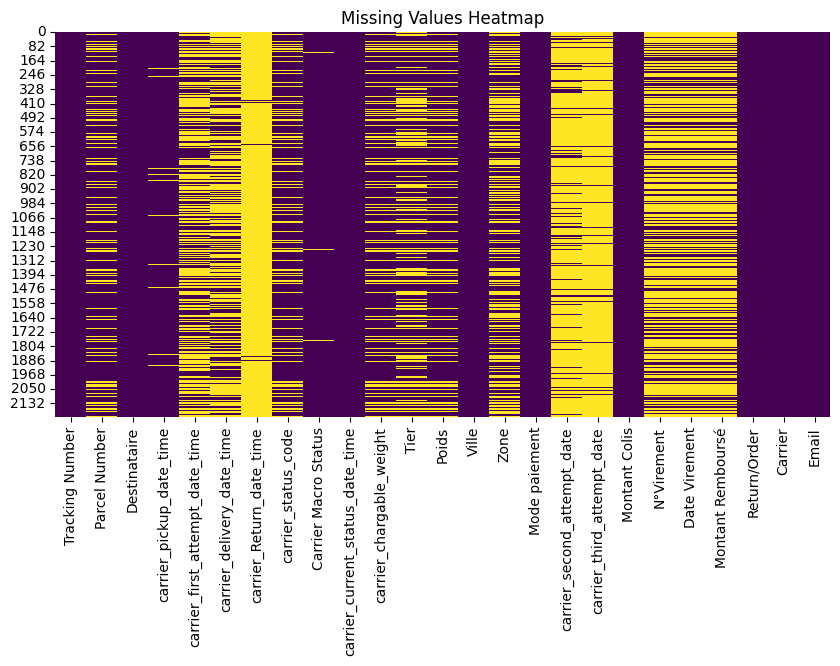

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


In [9]:
# Columns to convert
date_columns = [
    'carrier_pickup_date_time',
    'carrier_first_attempt_date_time',
    'carrier_delivery_date_time',
    'carrier_Return_date_time',
    'carrier_current_status_date_time',
    'carrier_second_attempt_date',
    'carrier_third_attempt_date',
    'Date Virement'
]

# Convert them safely to datetime
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Optional: Check conversion results
print("✅ Datetime conversion completed:")
print(df[date_columns].dtypes)



✅ Datetime conversion completed:
carrier_pickup_date_time            datetime64[ns]
carrier_first_attempt_date_time     datetime64[ns]
carrier_delivery_date_time          datetime64[ns]
carrier_Return_date_time            datetime64[ns]
carrier_current_status_date_time    datetime64[ns]
carrier_second_attempt_date         datetime64[ns]
carrier_third_attempt_date          datetime64[ns]
Date Virement                       datetime64[ns]
dtype: object


In [14]:
# Show all columns with their data types
print(" Data Types of All Columns:\n")
column_dtypes = pd.DataFrame(df.dtypes, columns=['Data Type'])
column_dtypes = column_dtypes.reset_index().rename(columns={'index': 'Column'})
display(column_dtypes)


 Data Types of All Columns:



,Column,Data Type
0,Tracking Number,object
1,Parcel Number,object
2,Destinataire,object
3,carrier_pickup_date_time,datetime64[ns]
4,carrier_first_attempt_date_time,datetime64[ns]
5,carrier_delivery_date_time,datetime64[ns]
6,carrier_Return_date_time,datetime64[ns]
7,carrier_status_code,float64
8,Carrier Macro Status,object
9,carrier_current_status_date_time,datetime64[ns]


# Step 2-  Create New Features for Analysis :

| Feature                               | Use                                  |
| ------------------------------------- | ------------------------------------ |
| `delivery_duration_days`              | KPI for carrier performance          |
| `delivery_attempts`                   | Operational efficiency               |
| `is_return`, `is_delivered`, `is_cod` | Segmentation & filtering             |
| `refund_delay_days`                   | Finance/Customer Satisfaction metric |


In [15]:

# 1. Delivery Duration (in days)
df['delivery_duration_days'] = (
    df['carrier_delivery_date_time'] - df['carrier_pickup_date_time']
).dt.days

# 2. Delivery Attempt Count
df['delivery_attempts'] = df[[
    'carrier_first_attempt_date_time',
    'carrier_second_attempt_date',
    'carrier_third_attempt_date'
]].notnull().sum(axis=1)

# 3. Flags: Delivered, Returned, Collected COD
df['is_delivered'] = df['Carrier Macro Status'].str.lower() == 'delivered'
df['is_return'] = df['Return/Order'].str.lower() == 'return'
df['is_cod'] = df['Mode paiement'].str.lower() == 'cod'

# 4. Refund delay (for returns)
df['refund_delay_days'] = (
    df['Date Virement'] - df['carrier_Return_date_time']
).dt.days

# Preview
print(df[['Tracking Number', 'is_delivered', 'is_return', 'is_cod', 'delivery_duration_days', 'delivery_attempts', 'refund_delay_days']].head())



  Tracking Number  is_delivered  is_return  is_cod  delivery_duration_days  \
0  62783936923591          True      False    True                     NaN   
1  62817161381831          True      False    True                     NaN   
2    R90913432874         False      False    True                     NaN   
3    R90900003138          True      False    True                     NaN   
4    R90900002632          True      False   False                     1.0   

   delivery_attempts  refund_delay_days  
0                  0                NaN  
1                  0                NaN  
2                  0                NaN  
3                  0                NaN  
4                  2                NaN  


In [16]:
# Save to Excel
output_path = r"C:\Users\145989\Downloads\Mojaa\cleaned_logistics_data.xlsx"
df.to_excel(output_path, index=False)
print(f" File saved successfully to:\n{output_path}")


 File saved successfully to:
C:\Users\145989\Downloads\Mojaa\cleaned_logistics_data.xlsx


## Step3 -EDA (Exploratory Data Analysis)

In [19]:
import pandas as pd

# Load cleaned data
file_path = r"C:\Users\145989\Downloads\Mojaa\cleaned_logistics_data.xlsx"
df = pd.read_excel(file_path)


C:\Users\145989\AppData\Local\Temp\ipykernel_14532\1761106084.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\145989\AppData\Local\Temp\ipykernel_14532\1761106084.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Not Delivered', 'Delivered'])


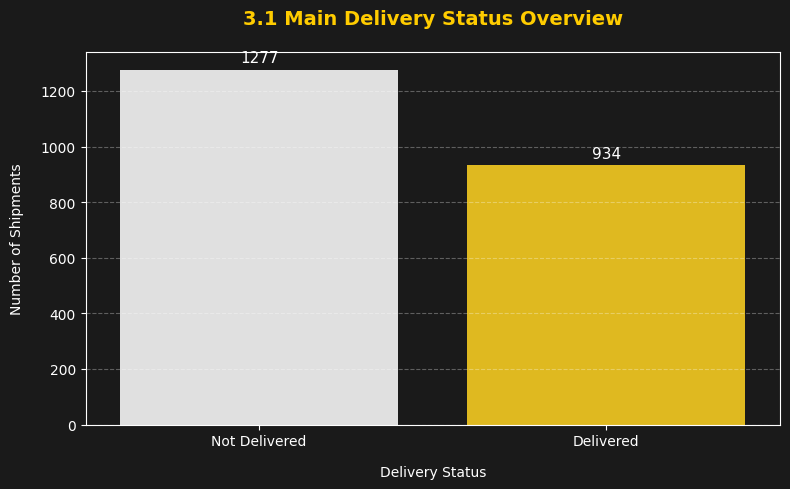

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Theme colors for Mojaa
mojaa_palette = {
    'background': '#1a1a1a',
    'text': '#ffffff',
    'highlight': '#ffcc00',
    'accent': '#e0e0e0'
}

# Apply dark style
plt.style.use('dark_background')
plt.rcParams.update({
    'axes.facecolor': mojaa_palette['background'],
    'figure.facecolor': mojaa_palette['background'],
    'axes.labelcolor': mojaa_palette['text'],
    'xtick.color': mojaa_palette['text'],
    'ytick.color': mojaa_palette['text'],
    'text.color': mojaa_palette['text'],
    'axes.titlesize': 14,
    'axes.titleweight': 'bold',
    'axes.titlecolor': mojaa_palette['highlight'],
})

# Actual plot
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(
    data=df,
    x='is_delivered',
    palette=[mojaa_palette['accent'], mojaa_palette['highlight']],
    ax=ax
)

# Labels & title
ax.set_title("3.1 Main Delivery Status Overview", pad=20)
ax.set_xlabel("Delivery Status", labelpad=12)
ax.set_ylabel("Number of Shipments", labelpad=12)
ax.set_xticklabels(['Not Delivered', 'Delivered'])

# Add count labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3, color=mojaa_palette['text'], fontsize=11)

# Grid and layout
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

C:\Users\145989\AppData\Local\Temp\ipykernel_14532\2181301669.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\145989\AppData\Local\Temp\ipykernel_14532\2181301669.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Order', 'Return'])


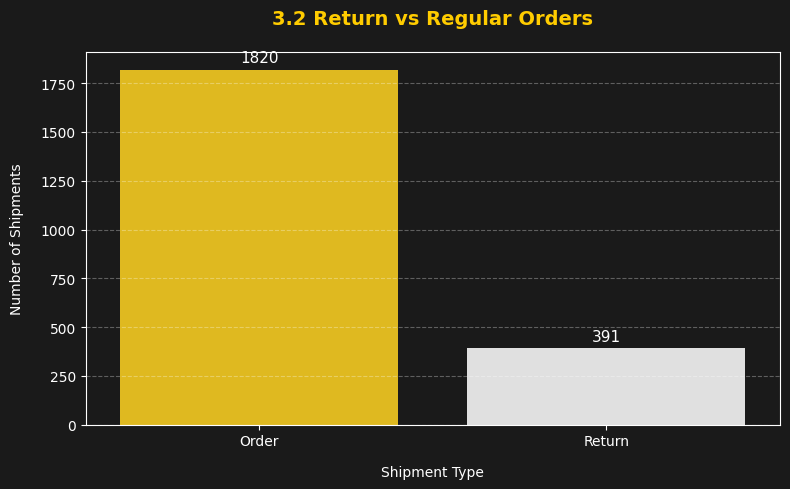

In [30]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(
    data=df,
    x='is_return',
    palette=[mojaa_palette['highlight'], mojaa_palette['accent']],
    ax=ax
)

# Title & labels
ax.set_title("3.2 Return vs Regular Orders", pad=20)
ax.set_xlabel("Shipment Type", labelpad=12)
ax.set_ylabel("Number of Shipments", labelpad=12)
ax.set_xticklabels(['Order', 'Return'])

# Count on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3, color=mojaa_palette['text'], fontsize=11)

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


C:\Users\145989\AppData\Local\Temp\ipykernel_14532\850118222.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\145989\AppData\Local\Temp\ipykernel_14532\850118222.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Prepayed', 'COD'])


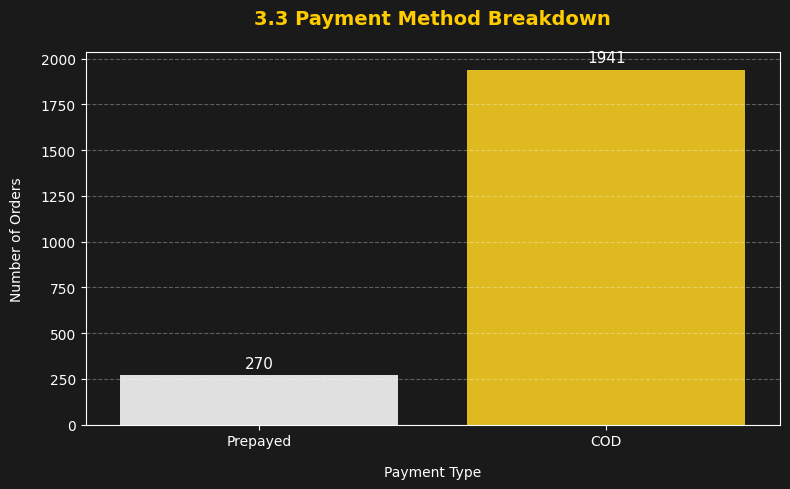

In [33]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(
    data=df,
    x='is_cod',
    palette=[mojaa_palette['accent'], mojaa_palette['highlight']],
    ax=ax
)

# Titles & labels
ax.set_title("3.3 Payment Method Breakdown", pad=20)
ax.set_xlabel("Payment Type", labelpad=12)
ax.set_ylabel("Number of Orders", labelpad=12)
ax.set_xticklabels(['Prepayed', 'COD'])

# Count labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3, color=mojaa_palette['text'], fontsize=11)

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()



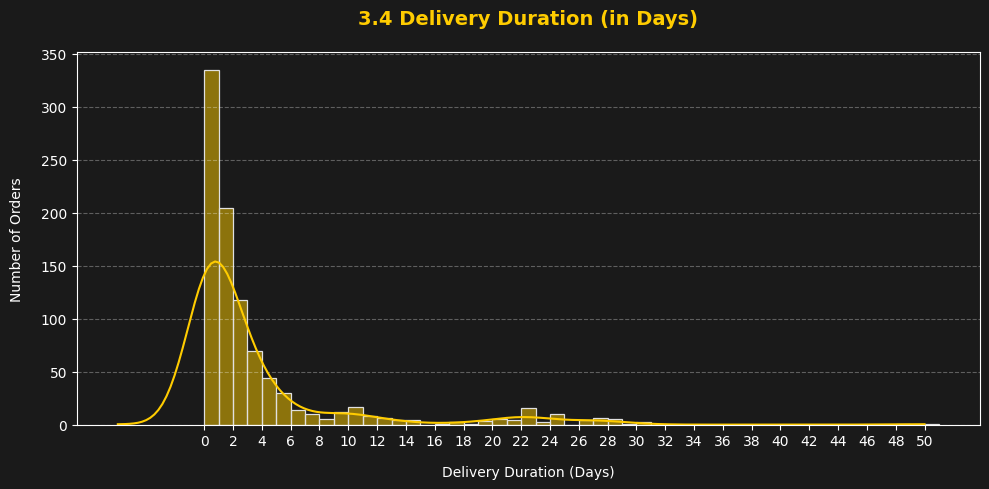

In [46]:
fig, ax = plt.subplots(figsize=(10, 5))

# Calculate bins by 1-day range, but display ticks by 2-day step
max_day = int(df['delivery_duration_days'].dropna().max())
bins = range(0, max_day + 2)

sns.histplot(
    df['delivery_duration_days'].dropna(),
    bins=bins,
    kde=True,
    color=mojaa_palette['highlight'],
    edgecolor=mojaa_palette['accent'],
    ax=ax
)

# Title and labels
ax.set_title("3.4 Delivery Duration (in Days)", pad=20)
ax.set_xlabel("Delivery Duration (Days)", labelpad=12)
ax.set_ylabel("Number of Orders", labelpad=12)

# Set xticks every 2 days
xticks = list(range(0, max_day + 1, 2))
ax.set_xticks(xticks)

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


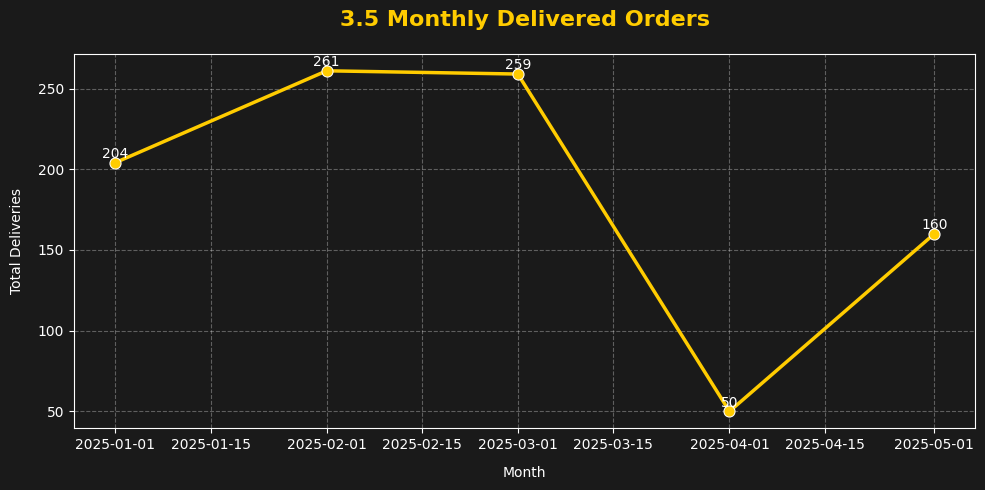

In [62]:
# Group deliveries by MONTH (e.g. 2025-01)
df['delivery_month'] = pd.to_datetime(df['carrier_delivery_date_time']).dt.to_period('M')
monthly_delivery = df[df['is_delivered']].groupby('delivery_month').size().reset_index(name='Delivered Orders')

# Convert period back to timestamp for plotting
monthly_delivery['delivery_month'] = monthly_delivery['delivery_month'].dt.to_timestamp()

# Plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(
    data=monthly_delivery,
    x='delivery_month',
    y='Delivered Orders',
    color=mojaa_palette['highlight'],
    linewidth=2.5,
    marker='o',
    markersize=8
)

# Title and labels
ax.set_title("3.5 Monthly Delivered Orders", fontsize=16, pad=20)
ax.set_xlabel("Month", labelpad=10)
ax.set_ylabel("Total Deliveries", labelpad=10)

# Add data labels
for i, row in monthly_delivery.iterrows():
    ax.text(row['delivery_month'], row['Delivered Orders'] + 1, row['Delivered Orders'],
            ha='center', va='bottom', fontsize=10, color=mojaa_palette['text'])

plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [109]:
# Sort data just in case
monthly_summary = monthly_summary.sort_values('delivery_month')

# Get total orders
jan_orders = monthly_summary.loc[monthly_summary['delivery_month'].dt.month == 1, 'total_orders'].values[0]
mar_orders = monthly_summary.loc[monthly_summary['delivery_month'].dt.month == 3, 'total_orders'].values[0]
may_orders = monthly_summary.loc[monthly_summary['delivery_month'].dt.month == 5, 'total_orders'].values[0]

# 1️⃣ Total Growth from Jan → Mar
growth_jan_to_mar = 100 * (mar_orders - jan_orders) / jan_orders

# 2️⃣ Total Drop from Mar → May
decline_mar_to_may = 100 * (mar_orders - may_orders) / mar_orders

# Output
print(f"📈 Total Growth (Jan → Mar): {growth_jan_to_mar:.2f}%")
print(f"📉 Total Decline (Mar → May): {decline_mar_to_may:.2f}%")


📈 Total Growth (Jan → Mar): 24.64%
📉 Total Decline (Mar → May): 39.16%


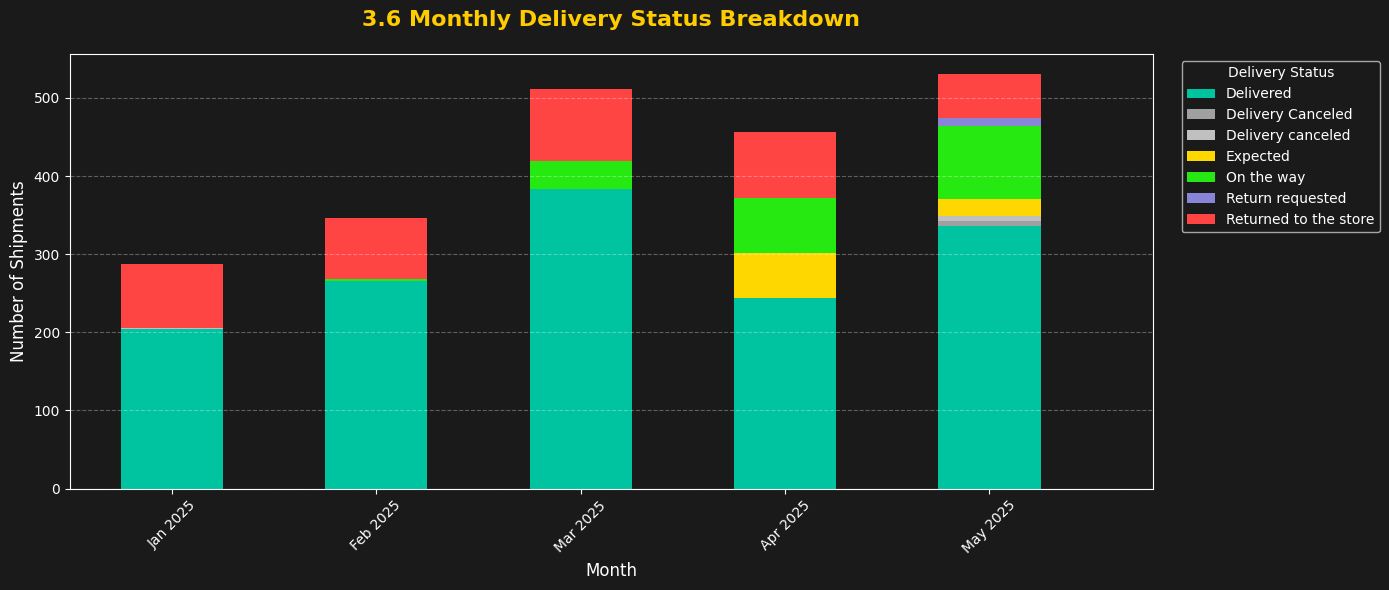

In [95]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Step 1: Group status by month
df['delivery_month'] = pd.to_datetime(df['carrier_delivery_date_time']).dt.to_period('M').dt.to_timestamp()
df['fallback_month'] = pd.to_datetime(df['carrier_pickup_date_time']).dt.to_period('M').dt.to_timestamp()
df['status_month'] = df['delivery_month'].fillna(df['fallback_month'])

status_month = (
    df[df['status_month'].notnull()]
    .groupby(['status_month', 'Carrier Macro Status'])
    .size()
    .reset_index(name='Count')
)

# Step 2: Pivot
status_pivot = status_month.pivot(index='status_month', columns='Carrier Macro Status', values='Count').fillna(0)
status_pivot = status_pivot.sort_index()

# Step 3: Custom colors
custom_palette = {
    'Delivered': '#00C49F',
    'On the way': "#27E912",
    'Returned to the store': '#FF4444',
    'Return requested': '#8884d8',
    'Expected': '#FFD700',
    'Delivery canceled': "#C0C0C0",
    'Delivery Canceled': '#A0A0A0'
}

# Fill any missing status with fallback gray
for col in status_pivot.columns:
    if col not in custom_palette:
        custom_palette[col] = '#AAAAAA'

# Step 4: Add extra space for annotation (adjust xlim)
fig, ax = plt.subplots(figsize=(14, 6))  # Wider to accommodate space
status_pivot.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    color=[custom_palette[col] for col in status_pivot.columns]
)

# Step 5: Format X-axis as "Month Year"
ax.set_xticks(range(len(status_pivot.index)))
ax.set_xticklabels([dt.strftime("%b %Y") for dt in status_pivot.index], rotation=45)

# Reserve space on the right for annotations
x_margin = 0.3
ax.set_xlim(-0.5, len(status_pivot.index) - 0.5 + x_margin)

# Labels and styling
ax.set_title("3.6 Monthly Delivery Status Breakdown", fontsize=16, pad=20)
ax.set_xlabel("Month", fontsize=12)
ax.set_ylabel("Number of Shipments", fontsize=12)
ax.legend(title='Delivery Status', loc='upper left', bbox_to_anchor=(1.02, 1.0))
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [116]:
# Step 1: Normalize status
df['normalized_status'] = df['Carrier Macro Status'].str.lower().str.strip()

# Step 2: Set status month (delivery or pickup)
df['delivery_month'] = pd.to_datetime(df['carrier_delivery_date_time']).dt.to_period('M').dt.to_timestamp()
df['fallback_month'] = pd.to_datetime(df['carrier_pickup_date_time']).dt.to_period('M').dt.to_timestamp()
df['status_month'] = df['delivery_month'].fillna(df['fallback_month'])

# Step 3: Calculate cancel rate based on "returned to the store"
monthly_cancel = df[df['status_month'].notnull()].groupby('status_month').agg(
    total_shipments=('Tracking Number', 'count'),
    cancelled_shipments=('normalized_status', lambda x: (x == 'returned to the store').sum())
).reset_index()

# Step 4: Compute percentage
monthly_cancel['cancel_rate'] = 100 * monthly_cancel['cancelled_shipments'] / monthly_cancel['total_shipments']

# View results
print("📉 Monthly Cancel Rate based on 'Returned to the store':")
print(monthly_cancel[['status_month', 'cancel_rate']])


📉 Monthly Cancel Rate based on 'Returned to the store':
  status_month  cancel_rate
0   2025-01-01    27.891156
1   2025-02-01    22.543353
2   2025-03-01    18.003914
3   2025-04-01    18.518519
4   2025-05-01    10.566038


In [114]:
# Normalize status column (lowercase to catch variations)
df['normalized_status'] = df['Carrier Macro Status'].str.lower().str.strip()

# Define problematic statuses
problem_statuses = [
    'on the way',
    'return requested',
    'delivery canceled'
]

# Step 1: Get delivery month fallback
df['delivery_month'] = pd.to_datetime(df['carrier_delivery_date_time']).dt.to_period('M').dt.to_timestamp()
df['fallback_month'] = pd.to_datetime(df['carrier_pickup_date_time']).dt.to_period('M').dt.to_timestamp()
df['status_month'] = df['delivery_month'].fillna(df['fallback_month'])

# Step 2: Aggregate per month
monthly_status_summary = df[df['status_month'].notnull()].groupby('status_month').agg(
    total_shipments=('Tracking Number', 'count'),
    unresolved_shipments=('normalized_status', lambda x: x.isin(problem_statuses).sum())
).reset_index()

# Step 3: Calculate percentage
monthly_status_summary['Backlog_percentage'] = 100 * monthly_status_summary['unresolved_shipments'] / monthly_status_summary['total_shipments']

# Show result
print(" Monthly % of Backlog Deliveries:")
print(monthly_status_summary[['status_month', 'Backlog_percentage']])


 Monthly % of Backlog Deliveries:
  status_month  Backlog_percentage
0   2025-01-01            0.680272
1   2025-02-01            0.578035
2   2025-03-01            7.045010
3   2025-04-01           15.468410
4   2025-05-01           22.075472


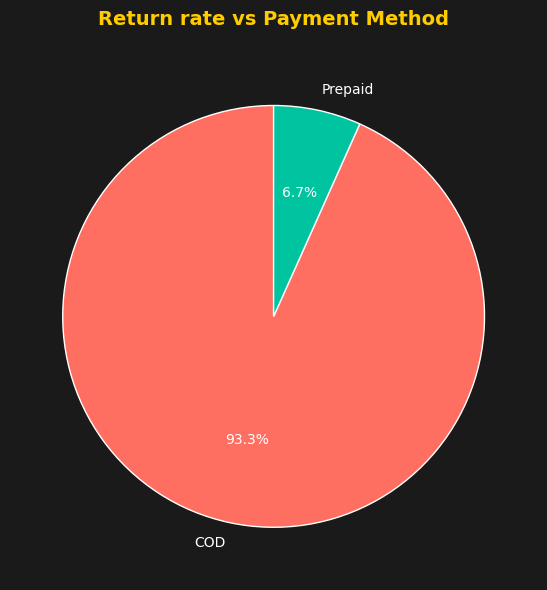

In [120]:
import matplotlib.pyplot as plt

# Step 1: Normalize necessary columns
df['status'] = df['Carrier Macro Status'].str.lower().str.strip()
df['payment'] = df['Mode paiement'].str.lower().str.strip().replace({'cod': 'COD', 'prepayed': 'Prepaid'})

# Step 2: Define backlog statuses
backlog_statuses = ['return requested', 'returned to the store']

# Step 3: Filter backlog rows
backlog_df = df[df['status'].isin(backlog_statuses)].copy()

# Step 4: Count by payment method
backlog_payment_counts = backlog_df['payment'].value_counts()

# Step 5: Plot pie chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(
    backlog_payment_counts,
    labels=backlog_payment_counts.index,
    autopct='%1.1f%%',
    colors=['#FF6F61', '#00C49F'],
    startangle=90,
    wedgeprops=dict(edgecolor='white')
)
ax.set_title("Return rate vs Payment Method", fontsize=14, pad=20)

plt.tight_layout()
plt.show()


C:\Users\145989\AppData\Local\Temp\ipykernel_14532\1999609536.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


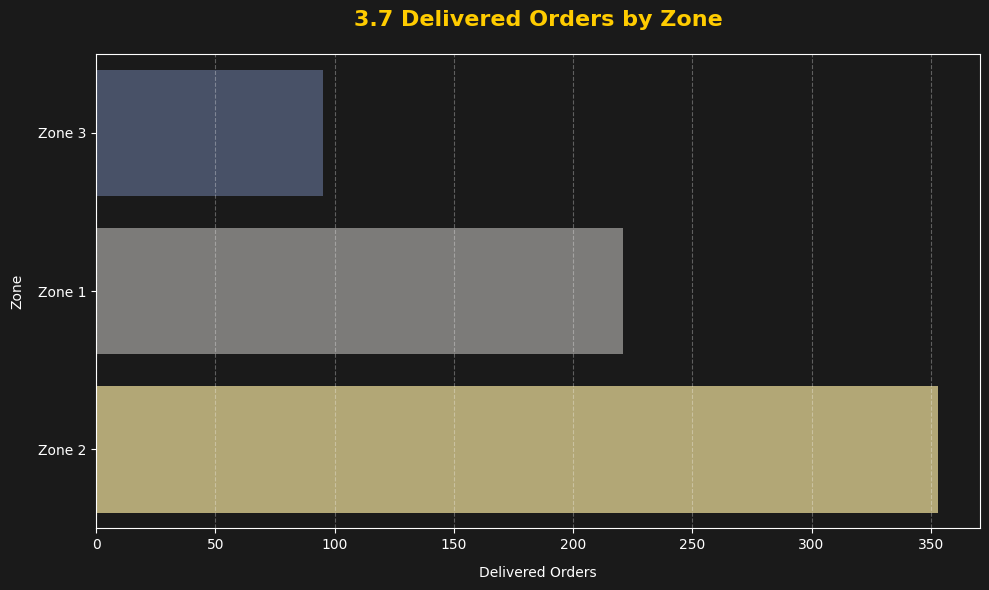

In [96]:
# Prepare the data
zone_df = df[df['is_delivered'] & df['Zone'].notnull()].copy()
zone_summary = zone_df.groupby('Zone').size().reset_index(name='Delivered Orders')
zone_summary = zone_summary.sort_values(by='Delivered Orders', ascending=True)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    data=zone_summary,
    x='Delivered Orders',
    y='Zone',
    palette='cividis',
    ax=ax
)

# Optional: remove axis ticks if needed
# ax.tick_params(left=False, bottom=False)

# Title and axis labels
ax.set_title("3.7 Delivered Orders by Zone", fontsize=16, pad=20)
ax.set_xlabel("Delivered Orders", labelpad=10)
ax.set_ylabel("Zone", labelpad=10)

plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


## "Zone A, B, and C account for over 60% of delivery volume. These zones are operationally critical and should be prioritized for optimization and resource allocation."



C:\Users\145989\AppData\Local\Temp\ipykernel_14532\2323685323.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


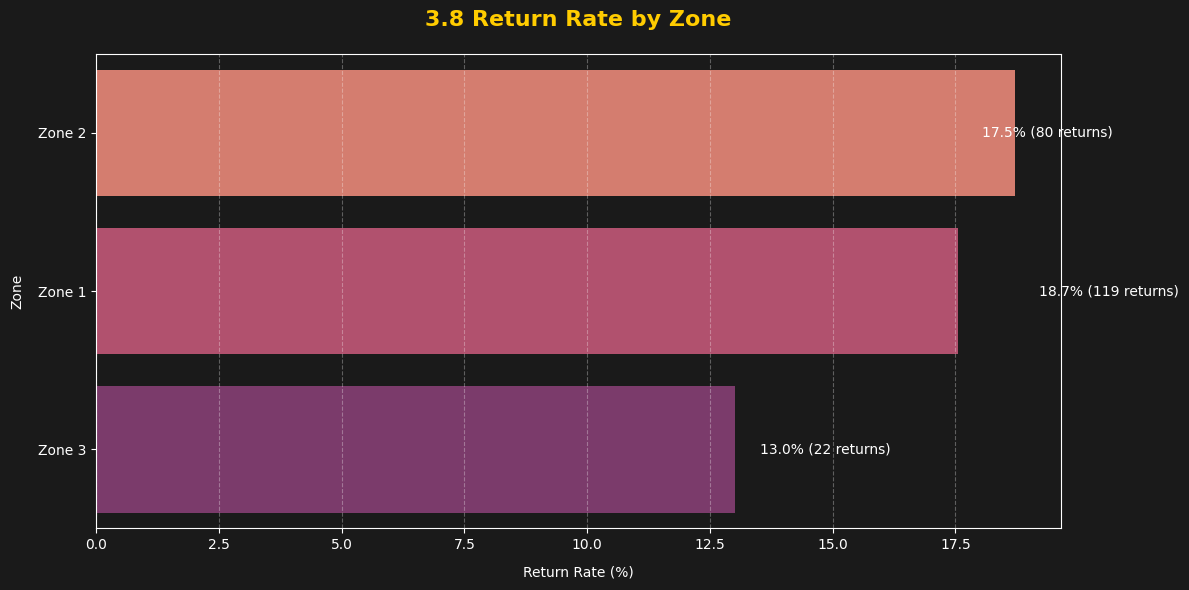

In [97]:
# Filter only rows with zone
zone_data = df[df['Zone'].notnull()].copy()

# Group by zone: calculate total orders and total returns
zone_returns = zone_data.groupby('Zone').agg(
    total_orders=('Tracking Number', 'count'),
    total_returns=('is_return', 'sum')
).reset_index()

# Calculate return rate %
zone_returns['return_rate'] = (zone_returns['total_returns'] / zone_returns['total_orders']) * 100

# Sort by return rate DESC
zone_returns = zone_returns.sort_values(by='return_rate', ascending=False)

# --- Plot ---
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(
    data=zone_returns,
    x='return_rate',
    y='Zone',
    palette='flare',
    ax=ax
)

# Add text labels (optionally inside bars)
for i, row in zone_returns.iterrows():
    label = f"{row['return_rate']:.1f}% ({int(row['total_returns'])} returns)"
    ax.text(row['return_rate'] + 0.5, i, label, va='center', fontsize=10, color=mojaa_palette['text'])

# Style
ax.set_title("3.8 Return Rate by Zone", fontsize=16, pad=20)
ax.set_xlabel("Return Rate (%)", labelpad=10)
ax.set_ylabel("Zone", labelpad=10)

plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


C:\Users\145989\AppData\Local\Temp\ipykernel_14532\4076635600.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


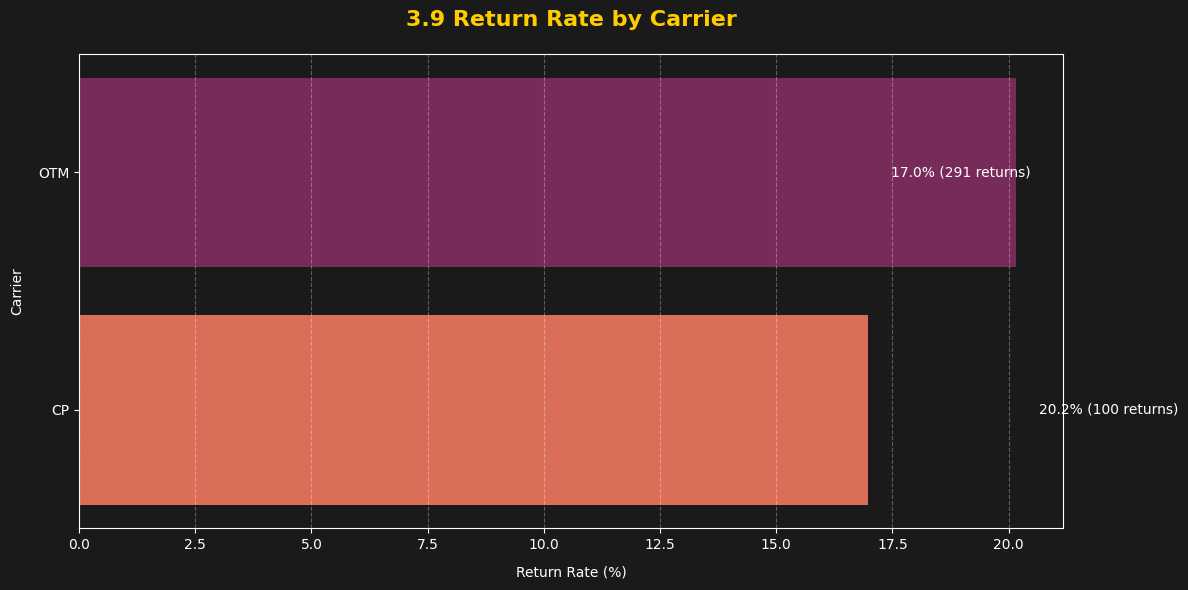

In [99]:
# Filter rows with carrier info
carrier_data = df[df['Carrier'].notnull()].copy()

# Group by Carrier
carrier_returns = carrier_data.groupby('Carrier').agg(
    total_orders=('Tracking Number', 'count'),
    total_returns=('is_return', 'sum')
).reset_index()

# Calculate return rate
carrier_returns['return_rate'] = (carrier_returns['total_returns'] / carrier_returns['total_orders']) * 100

# Sort by return rate descending
carrier_returns = carrier_returns.sort_values(by='return_rate', ascending=False)

# Force categorical ordering
carrier_returns['Carrier'] = pd.Categorical(
    carrier_returns['Carrier'],
    categories=carrier_returns['Carrier'],
    ordered=True
)

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(
    data=carrier_returns,
    x='return_rate',
    y='Carrier',
    palette='rocket',
    ax=ax
)

# Add rate labels
for i, row in carrier_returns.iterrows():
    ax.text(
        row['return_rate'] + 0.5,
        i,
        f"{row['return_rate']:.1f}% ({int(row['total_returns'])} returns)",
        color=mojaa_palette['text'],
        va='center',
        fontsize=10
    )

# Styling
ax.set_title("3.9 Return Rate by Carrier", fontsize=16, pad=20)
ax.set_xlabel("Return Rate (%)", labelpad=10)
ax.set_ylabel("Carrier", labelpad=10)
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [110]:
# Filter only delivered shipments with valid delivery duration and carrier
valid_deliveries = df[
    df['is_delivered'] &
    df['delivery_duration_days'].notnull() &
    df['Carrier'].notnull()
]

# Group and calculate mean
avg_delivery_by_carrier = valid_deliveries.groupby('Carrier')['delivery_duration_days'].mean().reset_index()
avg_delivery_by_carrier = avg_delivery_by_carrier.sort_values(by='delivery_duration_days', ascending=True)

# Show result
print("📊 Average Delivery Time Per Carrier (in days):")
print(avg_delivery_by_carrier)


📊 Average Delivery Time Per Carrier (in days):
  Carrier  delivery_duration_days
0      CP                3.450749


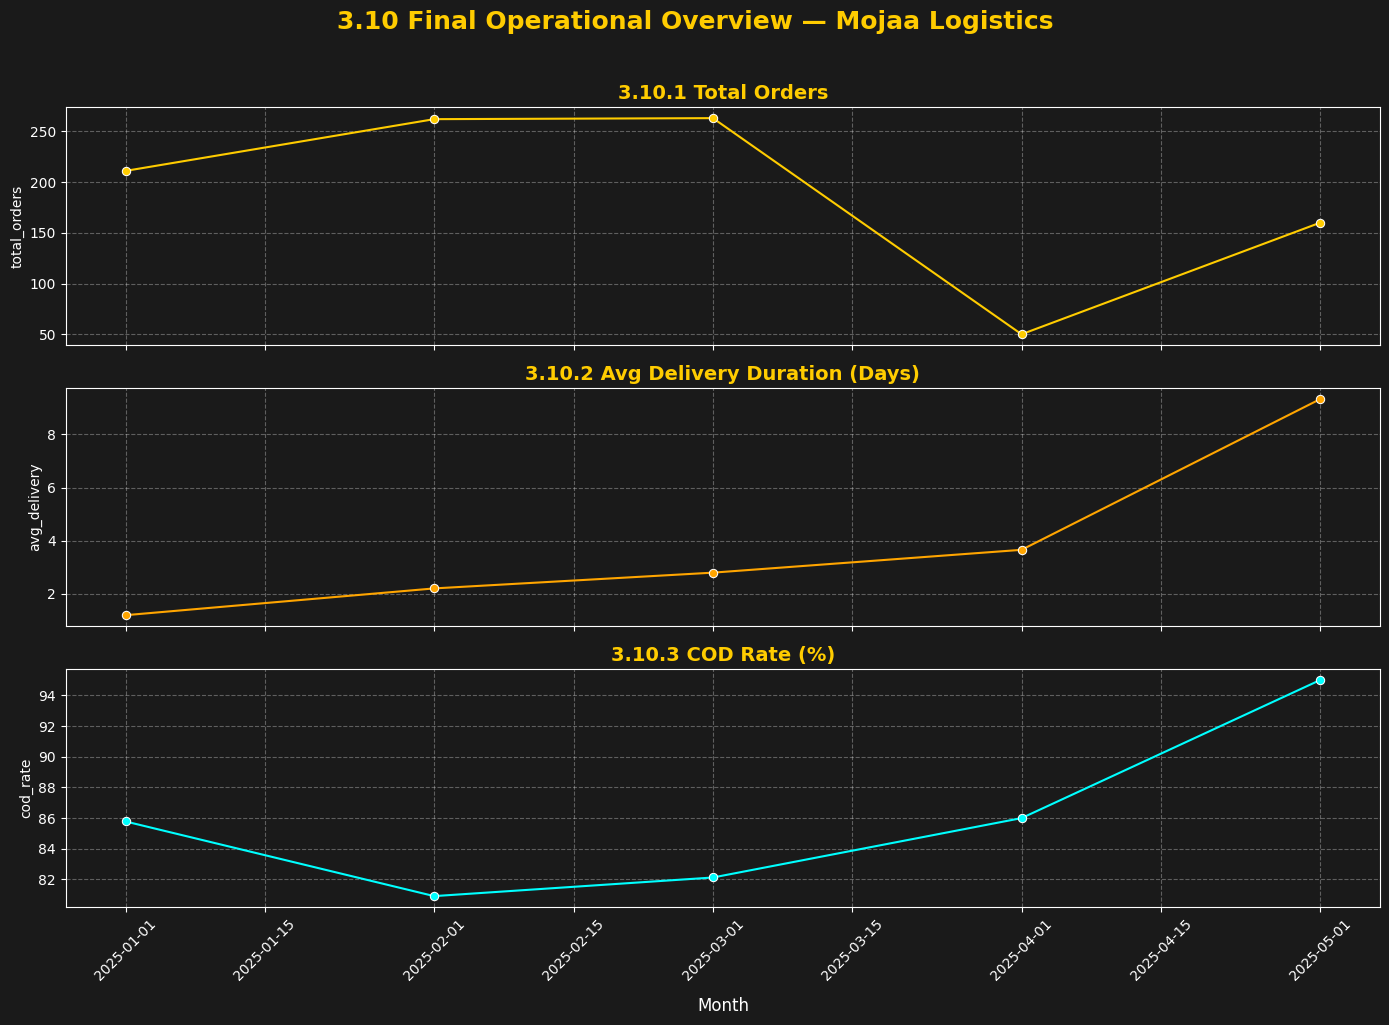

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare monthly base
df['delivery_month'] = pd.to_datetime(df['carrier_delivery_date_time']).dt.to_period('M').dt.to_timestamp()
monthly_df = df[df['delivery_month'].notnull()].copy()

# Aggregate without return rate
monthly_summary = monthly_df.groupby('delivery_month').agg(
    total_orders=('Tracking Number', 'count'),
    avg_delivery=('delivery_duration_days', 'mean'),
    cod_rate=('is_cod', lambda x: 100 * x.sum() / x.count())
).reset_index()

# Plot with 3 subplots only
fig, axs = plt.subplots(3, 1, figsize=(14, 10), sharex=True)
fig.suptitle("3.10 Final Operational Overview — Mojaa Logistics", fontsize=18, color=mojaa_palette['highlight'], weight='bold', y=1.02)

# 1. Total Orders
sns.lineplot(data=monthly_summary, x='delivery_month', y='total_orders', ax=axs[0], color=mojaa_palette['highlight'], marker='o')
axs[0].set_title("3.10.1 Total Orders", fontsize=14)
axs[0].grid(True, linestyle='--', alpha=0.3)

# 2. Avg Delivery Duration
sns.lineplot(data=monthly_summary, x='delivery_month', y='avg_delivery', ax=axs[1], color='orange', marker='o')
axs[1].set_title("3.10.2 Avg Delivery Duration (Days)", fontsize=14)
axs[1].grid(True, linestyle='--', alpha=0.3)

# 3. COD Rate
sns.lineplot(data=monthly_summary, x='delivery_month', y='cod_rate', ax=axs[2], color='cyan', marker='o')
axs[2].set_title("3.10.3 COD Rate (%)", fontsize=14)
axs[2].grid(True, linestyle='--', alpha=0.3)

# Styling
for ax in axs:
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel("")

axs[2].set_xlabel("Month", fontsize=12, labelpad=10)
plt.tight_layout()
plt.show()


In [123]:
import pandas as pd

# Load the Excel file
file_path = 'C:\\Users\\145989\\Downloads\\Mojaa\\cleaned_logistics_data.xlsx'  # or full path if needed
df = pd.read_excel(file_path)

# Convert pickup date to datetime
df['carrier_pickup_date_time'] = pd.to_datetime(df['carrier_pickup_date_time'], errors='coerce')

# Drop rows with missing dates or sales values
df = df.dropna(subset=['carrier_pickup_date_time', 'Montant Colis'])

# Create a 'month' column for grouping
df['month'] = df['carrier_pickup_date_time'].dt.to_period('M')

# Group by month and sum sales
monthly_sales = (
    df.groupby('month')['Montant Colis']
    .sum()
    .reset_index()
)

# Convert month back to timestamp for filtering
monthly_sales['month'] = monthly_sales['month'].dt.to_timestamp()

# Filter for range: January 2025 to May 2025
monthly_sales_filtered = monthly_sales[
    (monthly_sales['month'] >= '2025-01-01') & 
    (monthly_sales['month'] <= '2025-05-31')
].copy()

# Calculate month-over-month growth %
monthly_sales_filtered['sales_growth_%'] = monthly_sales_filtered['Montant Colis'].pct_change() * 100

# Calculate average monthly growth
average_growth_filtered = monthly_sales_filtered['sales_growth_%'].mean()

# Output result
print("Average Monthly Growth (Jan–May 2025):", round(average_growth_filtered, 2), "%")


Average Monthly Growth (Jan–May 2025): 8.48 %


In [126]:
import pandas as pd

# Load the Excel file
file_path = r'C:\Users\145989\Downloads\Mojaa\cleaned_logistics_data.xlsx'
df = pd.read_excel(file_path)

# Ensure date column is datetime
df['carrier_pickup_date_time'] = pd.to_datetime(df['carrier_pickup_date_time'], errors='coerce')

# Create 'month' column from pickup date
df['pickup_month'] = df['carrier_pickup_date_time'].dt.to_period('M').dt.to_timestamp()

# Drop rows with missing prices or dates
df_filtered = df.dropna(subset=['pickup_month', 'Montant Colis'])

# Group by month and calculate average shipment price
monthly_avg_price = (
    df_filtered.groupby('pickup_month')['Montant Colis']
    .mean()
    .reset_index()
    .rename(columns={'Montant Colis': 'avg_shipment_price'})
)

# Show result
print(monthly_avg_price)


  pickup_month  avg_shipment_price
0   2024-12-01          406.670000
1   2025-01-01          688.918536
2   2025-02-01          562.320405
3   2025-03-01          519.663790
4   2025-04-01          632.014902
5   2025-05-01          609.892457


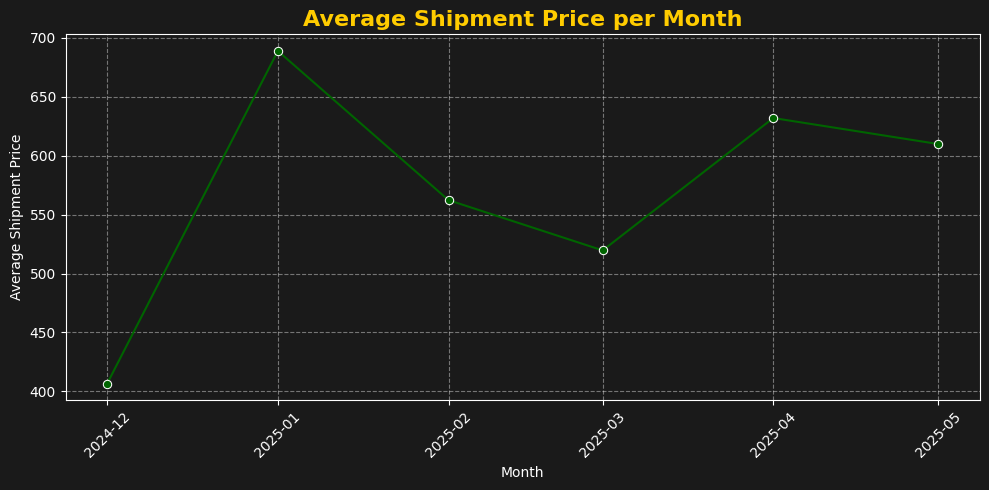

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_avg_price, x='pickup_month', y='avg_shipment_price', marker='o', color='darkgreen')
plt.title("Average Shipment Price per Month", fontsize=16, weight='bold')
plt.xlabel("Month")
plt.ylabel("Average Shipment Price")
plt.grid(True, linestyle='--', alpha=0.4)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


🔝 Most Profitable Zone:
Zone 2 — 386309.51 EGP (53.11%)

📊 Revenue by Zone:
     Zone  total_revenue  revenue_share_%
1  Zone 2      386309.51        53.112294
0  Zone 1      219433.80        30.169158
2  Zone 3      121601.49        16.718548


C:\Users\145989\AppData\Local\Temp\ipykernel_14532\2888876229.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=zone_revenue, x='Zone', y='total_revenue', palette='viridis')


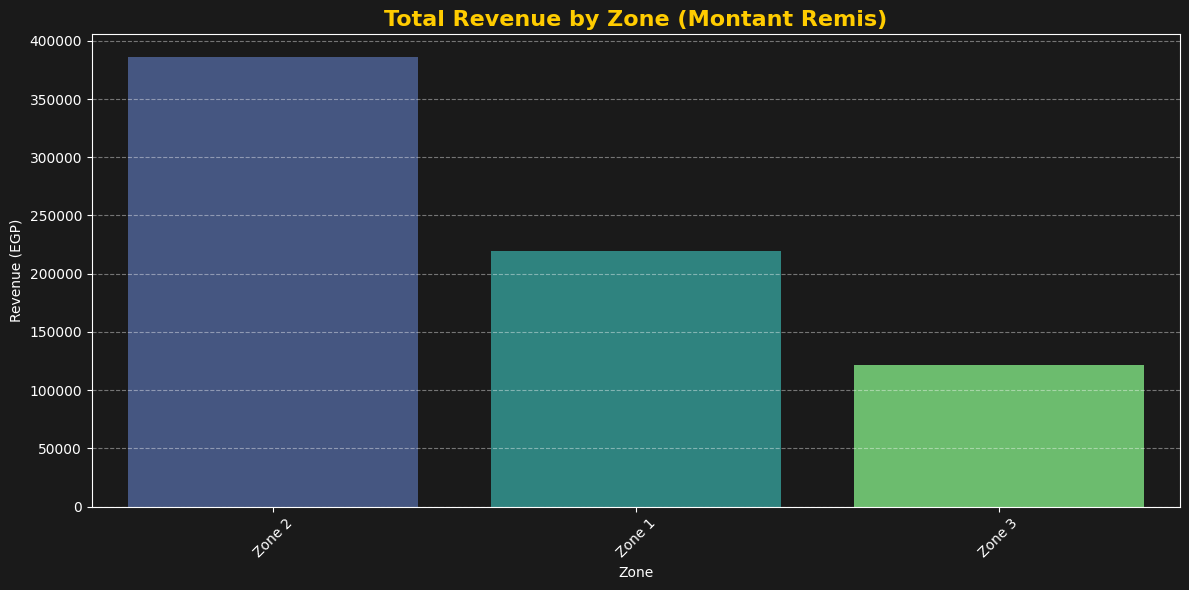

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
file_path = r'C:\Users\145989\Downloads\Mojaa\cleaned_logistics_data.xlsx'
df = pd.read_excel(file_path)

# Clean: Drop rows with missing revenue or zone
df = df.dropna(subset=['Zone', 'Montant Colis'])

# Group by Zone and sum collected revenue
zone_revenue = (
    df.groupby('Zone')['Montant Colis']
    .sum()
    .reset_index()
    .rename(columns={'Montant Colis': 'total_revenue'})
    .sort_values(by='total_revenue', ascending=False)
)

# Calculate % share of total revenue
total = zone_revenue['total_revenue'].sum()
zone_revenue['revenue_share_%'] = (zone_revenue['total_revenue'] / total) * 100

# Identify most profitable zone
top_zone = zone_revenue.iloc[0]

# Display the stats
print("🔝 Most Profitable Zone:")
print(f"{top_zone['Zone']} — {top_zone['total_revenue']:.2f} EGP ({top_zone['revenue_share_%']:.2f}%)\n")

print("📊 Revenue by Zone:")
print(zone_revenue)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=zone_revenue, x='Zone', y='total_revenue', palette='viridis')
plt.title("Total Revenue by Zone (Montant Remis)", fontsize=16, weight='bold')
plt.ylabel("Revenue (EGP)")
plt.xlabel("Zone")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.4)
plt.show()


## Python Exchange Converter API

2025-06-03 22:14:49.753 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-03 22:14:49.755 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-03 22:14:49.756 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-03 22:14:49.758 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-03 22:14:49.760 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-03 22:14:49.761 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-03 22:14:49.762 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [138]:
pip install pandas requests


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [143]:
import pandas as pd
import requests
from IPython.display import display

# Load Excel file
file_path = r"C:\Users\145989\Downloads\Mojaa\cleaned_logistics_data.xlsx"
df = pd.read_excel(file_path)

# Clean and sum
if "Montant Colis" in df.columns:
    df["Montant Colis"] = pd.to_numeric(df["Montant Colis"], errors="coerce")
    total_mad = df["Montant Colis"].sum()
else:
    raise ValueError("❌ Column 'Montant Colis' not found in the Excel file.")

# Fetch rates from exchangerate.host (no API key needed)
url = "https://api.exchangerate.host/latest?base=MAD&symbols=USD,AED"
response = requests.get(url)
rates = response.json().get("rates", {})

# Print raw response for debug
print("Rates fetched:", rates)

# Check if response is valid
if not rates or all(rate == 0 for rate in rates.values()):
    raise ValueError("❌ Live exchange rates unavailable. Check connection or API.")

# Convert
total_usd = total_mad * rates["USD"]
total_aed = total_mad * rates["AED"]

# Show table
summary = pd.DataFrame({
    "Currency": ["MAD", "USD", "AED"],
    "Total": [total_mad, total_usd, total_aed]
})

display(summary.style.format({"Total": "{:,.2f}"}).set_caption("💰 Total Cash Collected by Currency"))


Rates fetched: {}


ValueError: ❌ Live exchange rates unavailable. Check connection or API.

In [145]:
import requests; print(requests.get("https://api.exchangerate.host/latest?base=MAD&symbols=USD,AED").status_code)


200


In [ ]:
import pandas as pd
from IPython.display import display

# Load Excel file
file_path = r"C:\Users\145989\Downloads\Mojaa\cleaned_logistics_data.xlsx"
df = pd.read_excel(file_path)

# Clean and sum
if "Montant Colis" in df.columns:
    df["Montant Colis"] = pd.to_numeric(df["Montant Colis"], errors="coerce")
    total_mad = df["Montant Colis"].sum()
else:
    raise ValueError(" Column 'Montant Colis' not found in the Excel file.")

# Cached rates (June 2025)
mad_to_usd = 0.0998
mad_to_aed = 0.3667

# Convert
total_usd = total_mad * mad_to_usd
total_aed = total_mad * mad_to_aed

# Show table
summary = pd.DataFrame({
    "Currency": ["MAD", "USD", "AED"],
    "Total": [total_mad, total_usd, total_aed]
})

display(summary.style.format({"Total": "{:,.2f}"}).set_caption("💰 Total Cash Collected by Currency (cached rates)"))


,Currency,Total
0,MAD,"1,317,398.73"
1,USD,"131,476.39"
2,AED,"483,090.11"


Raw response: {'success': False, 'error': {'code': 101, 'type': 'missing_access_key', 'info': 'You have not supplied an API Access Key. [Required format: access_key=YOUR_ACCESS_KEY]'}}


ValueError: ❌ Got response, but no valid exchange rates.

In [149]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output

# Cached exchange rates
mad_to_usd = 0.0998
mad_to_aed = 0.3667

# Create input widget
mad_input = widgets.FloatText(
    value=0.0,
    description='Amount in MAD:',
    step=0.01,
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

# Create button
convert_btn = widgets.Button(description="Convert", button_style='success')

# Output area
output = widgets.Output()

# Define action
def convert_currency(b):
    with output:
        clear_output()
        input_mad = mad_input.value
        total_usd = input_mad * mad_to_usd
        total_aed = input_mad * mad_to_aed

        summary = pd.DataFrame({
            "Currency": ["MAD", "USD", "AED"],
            "Amount": [input_mad, total_usd, total_aed]
        })

        display(summary.style.format({"Amount": "{:,.2f}"}).set_caption("💱 Manual Currency Conversion (cached rates)"))

# Link button to function
convert_btn.on_click(convert_currency)

# Display form
display(mad_input, convert_btn, output)


ModuleNotFoundError: No module named 'ipywidgets'